In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [6]:
sns.set(style="whitegrid")

df=pd.read_csv('Downloads/clean_ev_data.csv')

In [30]:
df.head()
df.columns

Index(['vin_110', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_cafv_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract',
       'longitude', 'latitude'],
      dtype='object')

In [8]:
df.columns=df.columns.str.lower()
df.head()

,vin_110,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,longitude,latitude
0,5YJ3E1EB6K,KING,SEATTLE,WA,98178.0,2019,TESLA,MODEL 3,BATTERY ELECTRIC VEHICLE (BEV),CLEAN ALTERNATIVE FUEL VEHICLE ELIGIBLE,220,0,37,101250425,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,-122.23825,47.49461
1,5YJYGAEE5M,YAKIMA,SELAH,WA,98942.0,2021,TESLA,MODEL Y,BATTERY ELECTRIC VEHICLE (BEV),ELIGIBILITY UNKNOWN AS BATTERY RANGE HAS NOT B...,0,0,15,224162858,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10,-120.53145,46.65405
2,5YJSA1E65N,YAKIMA,GRANGER,WA,98932.0,2022,TESLA,MODEL S,BATTERY ELECTRIC VEHICLE (BEV),ELIGIBILITY UNKNOWN AS BATTERY RANGE HAS NOT B...,0,0,15,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10,-120.18710,46.33949
3,5YJ3E1EBXN,KING,BELLEVUE,WA,98004.0,2022,TESLA,MODEL 3,BATTERY ELECTRIC VEHICLE (BEV),ELIGIBILITY UNKNOWN AS BATTERY RANGE HAS NOT B...,0,0,41,219428079,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.18720,47.61001
4,JM3KKEHA8S,THURSTON,YELM,WA,98597.0,2025,MAZDA,CX-90,PLUG-IN HYBRID ELECTRIC VEHICLE (PHEV),NOT ELIGIBLE DUE TO LOW BATTERY RANGE,26,0,2,277791643,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10,-122.60735,46.94239


In [ ]:

#most popular ev
#top_makes=df['make'].value_counts().head(10)
ev_only = df[df['electric_vehicle_type'] == 'BATTERY ELECTRIC VEHICLE (BEV)']
ev_only.plot(kind='bar',title='Top 10 EV Makers',color='skyblue')
#top_makes.plot(kind='bar',title='Top 10 EV Makers',color='skyblue')
plt.xlabel('make')
plt.ylabel('Number od Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

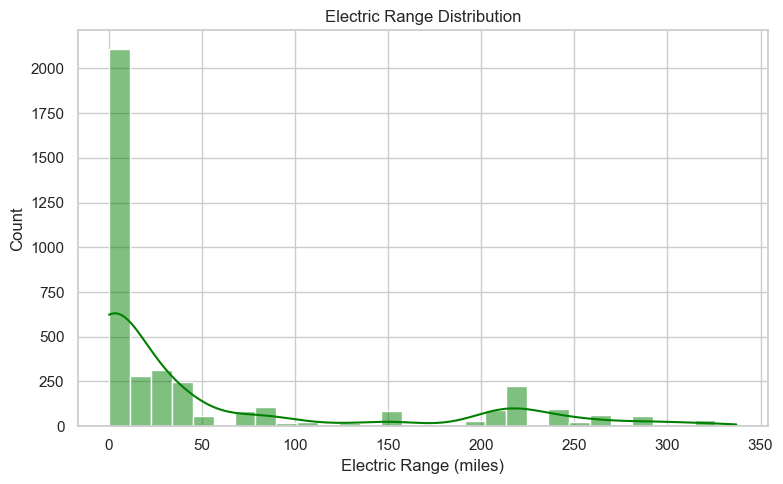

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['electric_range'], bins=30, kde=True, color='green')
plt.title('Electric Range Distribution')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


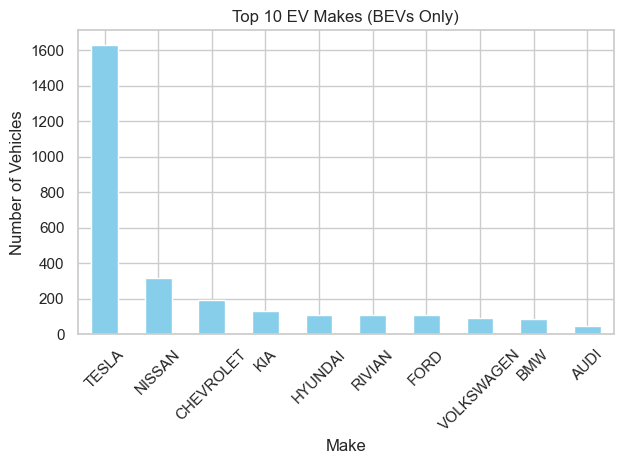

In [11]:
ev_only = df[df['electric_vehicle_type'] == 'BATTERY ELECTRIC VEHICLE (BEV)']
top_makes = ev_only['make'].value_counts().head(10)
top_makes.plot(kind='bar', title='Top 10 EV Makes (BEVs Only)', color='skyblue')
plt.xlabel('Make')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


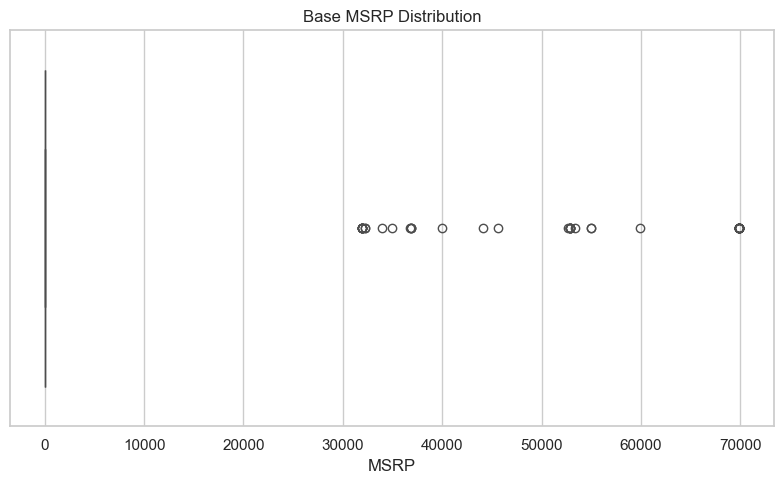

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['base_msrp'], color='orange')
plt.title('Base MSRP Distribution')
plt.xlabel('MSRP')
plt.tight_layout()
plt.show()


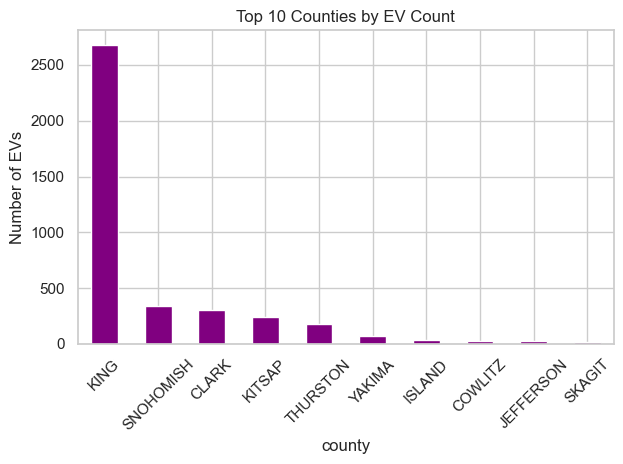

In [28]:
top_counties = df['county'].value_counts().head(10)
top_counties.plot(kind='bar', title='Top 10 Counties by EV Count', color='purple')
plt.xlabel('county')
plt.ylabel('Number of EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
## What We Did
We performed initial exploratory analysis on electric vehicle registration data in Washington state to understand:

1. Which EV brands are most common
2. How far EVs can go on a full charge
3. The price distribution of electric vehicles
4. Which counties have the most EVs


In [ ]:
Tesla dominates with high registration numbers 

Electric range is skewed towards 150–300 miles 

Most EVs fall under $30K–$60K MSRP

King, Snohomish, and Pierce counties lead in EV adoption — urban concentration.

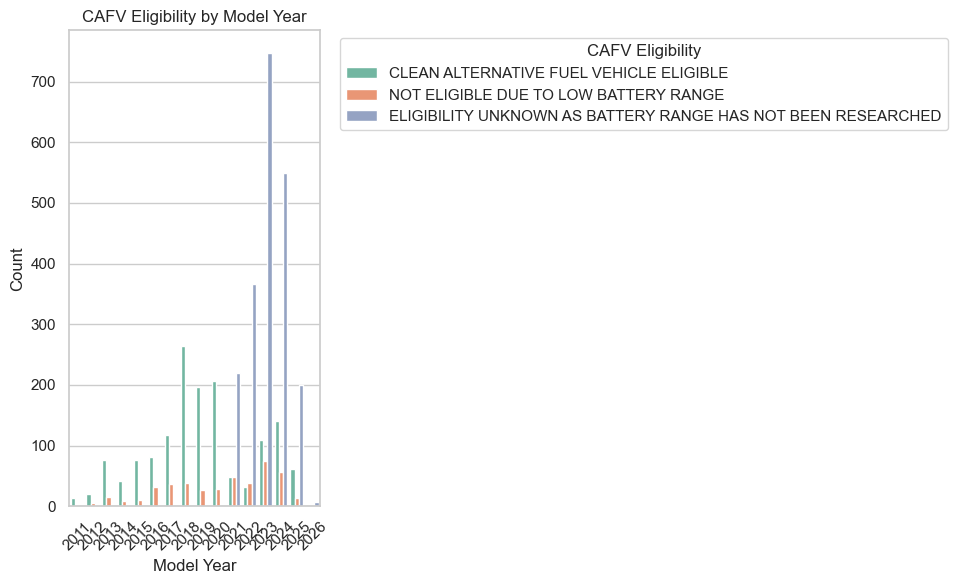

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='model_year', hue='clean_alternative_fuel_vehicle_cafv_eligibility', palette='Set2')
plt.title('CAFV Eligibility by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='CAFV Eligibility', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
